In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
from random import randint
from mpl_toolkits.mplot3d import axes3d
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
os.chdir('C:\\Users\\Antonio\\Desktop\\KAGGLE MEETUP\\CareerCon')


In [2]:
X = pd.read_csv('X_train.csv')

In [4]:
X.sample(5)

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
62724,490_4,490,4,-0.38144,-0.90917,-0.157890,-0.054632,-0.015289,0.070106,-0.044966,0.49608,0.091862,-7.1079
38818,303_34,303,34,0.46476,-0.87240,-0.127840,0.081078,0.030352,0.055029,-0.008570,-1.73720,3.465500,-10.6020
111237,869_5,869,5,-0.82979,0.53767,0.076945,-0.128190,0.005005,0.012384,-0.013910,0.10366,3.306900,-9.4933
130761,1021_73,1021,73,0.88320,-0.44329,-0.060547,0.140650,-0.013132,-0.005488,-0.018294,-0.17609,3.826100,-8.3409
401965,3140_45,3140,45,0.64014,-0.75968,-0.081424,0.080560,-0.067902,0.049108,-0.187260,0.13142,-0.944270,-9.8528


In [3]:
test = pd.read_csv('X_test.csv')

In [4]:
Y = pd.read_csv('Y_train.csv')

In [6]:
Y.sample(5)

,series_id,group_id,surface
1133,1133,28,tiled
2227,2227,47,concrete
290,290,29,soft_pvc
1891,1891,72,fine_concrete
1500,1500,21,soft_tiles


# Exploratory analysis

In [7]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
series_id,487680.0,1904.500000,1099.853353,0.00000,952.000000,1904.500000,2857.000000,3809.00000
measurement_number,487680.0,63.500000,36.949327,0.00000,31.750000,63.500000,95.250000,127.00000
orientation_X,487680.0,-0.018050,0.685696,-0.98910,-0.705120,-0.105960,0.651803,0.98910
orientation_Y,487680.0,0.075062,0.708226,-0.98965,-0.688980,0.237855,0.809550,0.98898
orientation_Z,487680.0,0.012458,0.105972,-0.16283,-0.089466,0.031949,0.122870,0.15571
orientation_W,487680.0,-0.003804,0.104299,-0.15662,-0.106060,-0.018704,0.097215,0.15477
angular_velocity_X,487680.0,0.000178,0.117764,-2.37100,-0.040752,0.000084,0.040527,2.28220
angular_velocity_Y,487680.0,0.008338,0.088677,-0.92786,-0.033191,0.005412,0.048068,1.07910
angular_velocity_Z,487680.0,-0.019184,0.229153,-1.26880,-0.090743,-0.005335,0.064604,1.38730
linear_acceleration_X,487680.0,0.129281,1.870600,-36.06700,-0.530833,0.124980,0.792263,36.79700


 - `linear_acceleration_Z` should be close to -9, but we can see some extreme values in min and max
 - `linear_acceleration_X` and `linear_acceleration_Y` with very large values as well

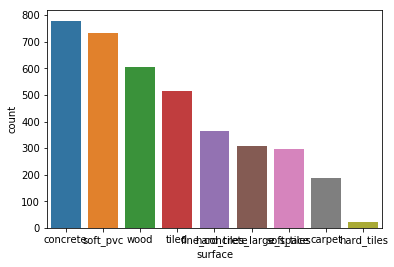

In [8]:
sns.countplot(x=Y.surface, data = Y, order=Y.surface.value_counts().index)

In [9]:
Y['surface'].value_counts().reset_index()

,index,surface
0,concrete,779
1,soft_pvc,732
2,wood,607
3,tiled,514
4,fine_concrete,363
5,hard_tiles_large_space,308
6,soft_tiles,297
7,carpet,189
8,hard_tiles,21


 - strong imbalance in `hard_tiles` class

 - ####  Let us check the orientation X and Y of 3 random series

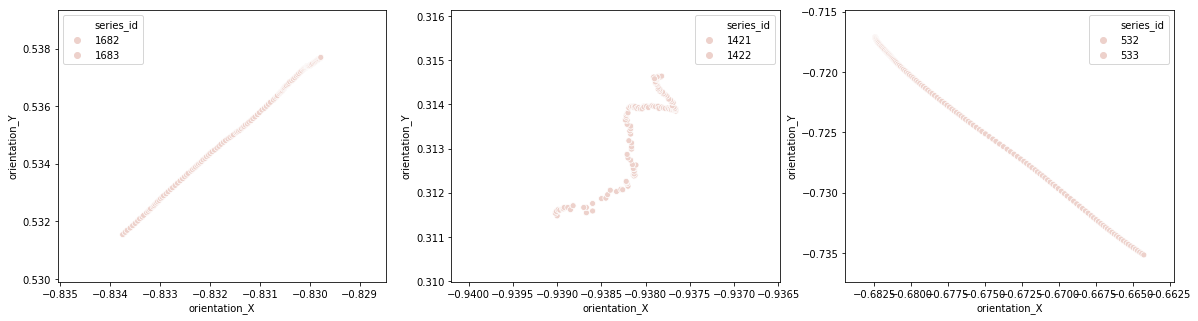

In [71]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5))
sns.scatterplot(x='orientation_X', y='orientation_Y', hue='series_id', data=X[X.series_id==randint(0,3809)], ax=axs[0])
sns.scatterplot(x='orientation_X', y='orientation_Y', hue='series_id', data=X[X.series_id==randint(0,3809)], ax=axs[1])
sns.scatterplot(x='orientation_X', y='orientation_Y', hue='series_id', data=X[X.series_id==randint(0,3809)], ax=axs[2])

- ####  Let us check the orientation X, Y and Z of an arbitrary series

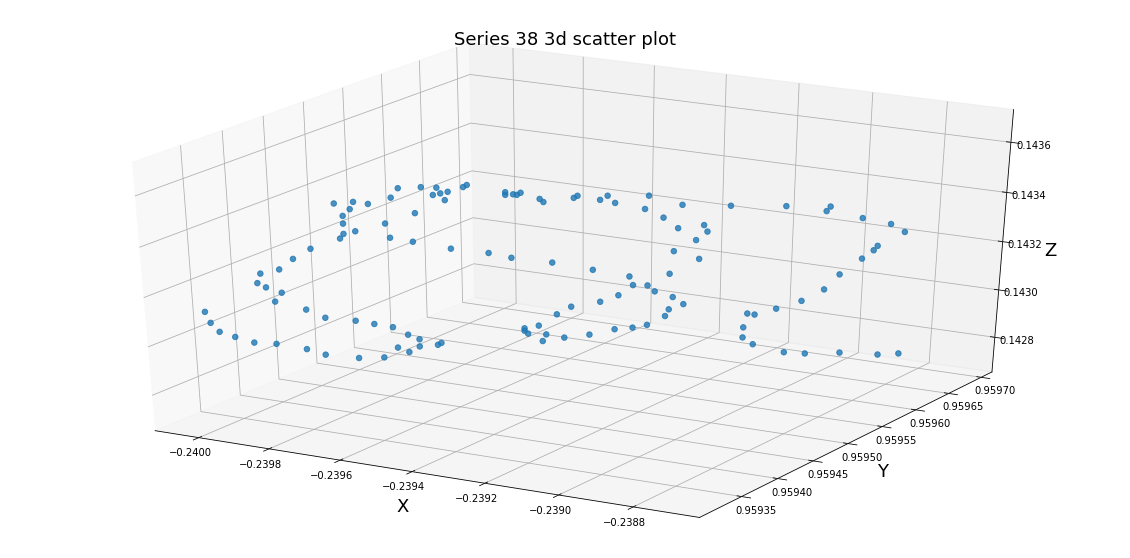

In [11]:
series38 = X[X.series_id==38]

x=series38.orientation_X.values
y=series38.orientation_Y.values
z=series38.orientation_Z.values

fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, alpha=0.8, s=30)
 
ax.set_xlabel('\nX', fontsize=18)
ax.set_ylabel('\nY', fontsize=18)
ax.set_zlabel('\nZ', fontsize=18)
plt.title('Series 38 3d scatter plot', fontsize=18)

ax.dist = 10

plt.show()

- ####  Let us check feature correlations

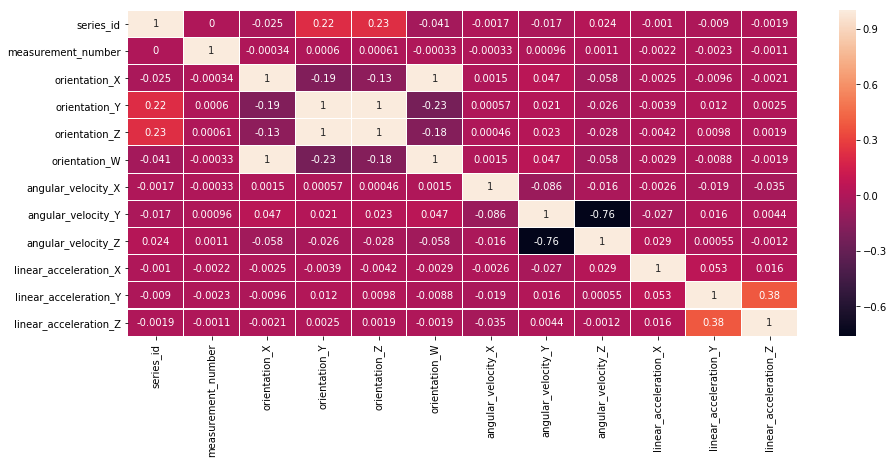

In [12]:
fig, ax = plt.subplots(1,1,figsize=(15,6))
sns.heatmap(X.corr(), annot=True, linewidths=0.05)

 - some strong correlations between `angular_velocity_Y` and `angular_velocity_Z`, but not too strong that we shouldn't be using the two variables
 - perfect correlation between `orientation_X` and `orientation_W`

### Studying extreme values of linear acceleration on the Z-axis (usual values should be close to -9)

In [ ]:
X.series_id[(X.linear_acceleration_Z<-15) | (X.linear_acceleration_Z>-3)].count()

In [21]:
X.series_id[(X.linear_acceleration_Z<-15) | (X.linear_acceleration_Z>-3)].nunique()

1615

In [66]:
extremeZ = X[(X.linear_acceleration_Z<-15) | (X.linear_acceleration_Z>-3)].groupby('series_id').count().sort_values(by=['row_id'], ascending=False)
extremeZ = extremeZ.join(Y.set_index('series_id'), on='series_id')
right = extremeZ[['row_id','surface']].groupby('surface').count().sort_values(by=['row_id'], ascending=False)
Y['surface'].value_counts().reset_index().join(right,on='index')

,index,surface,row_id
0,concrete,779,593.0
1,soft_pvc,732,40.0
2,wood,607,162.0
3,tiled,514,420.0
4,fine_concrete,363,120.0
5,hard_tiles_large_space,308,234.0
6,soft_tiles,297,4.0
7,carpet,189,42.0
8,hard_tiles,21,NaN


 - extreme values don't come up often in `soft_pvc` neither `soft_tiles`, which could indicate that the surges in acceleration_Z happens mostly in rougher surfaces. If it occurs due to the robot falling on its side it could make sense to exclude these records

In [69]:
extremeZ[['row_id','surface']].groupby('surface').mean().sort_values(by=['row_id'], ascending=False)

,row_id
surface,
hard_tiles_large_space,29.269231
carpet,16.380952
wood,14.641975
tiled,13.376190
concrete,12.241147
fine_concrete,6.600000
soft_pvc,5.600000
soft_tiles,2.750000


 - average number of measurements where acceleration Z is extreme is higher in `hard_tiles_large_space`, which would make sense given that the robot doing more severe movements could be more common
 - given this observation, it is possible that these measurements can mislead our model. Hence, we will remove them in the train and test set

In [5]:
X = X[(X.linear_acceleration_Z<-3) & (X.linear_acceleration_Z>-15)]
test = test[(test.linear_acceleration_Z<-3) & (test.linear_acceleration_Z>-15)]

# Feature engineering

 - from quaternions X, Y, Z and W I calculate `yaw`, `pitch` and `roll`

In [6]:
def yaw(x,y,z,w):
    return np.arctan2(2*(y*z + w*x), w*w - x*x - y*y + z*z)

def pitch(x,y,z,w):
    return np.arcsin(-2*(x*z-w*y))

def roll(x,y,z,w):
    return np.arctan2(2*(x*y + w*z), w*w + x*x - y*y - z*z)

In [7]:
X['yaw']=yaw(X.orientation_X,X.orientation_Y,X.orientation_Z,X.orientation_W)
X['pitch']=pitch(X.orientation_X,X.orientation_Y,X.orientation_Z,X.orientation_W)
X['roll']=roll(X.orientation_X,X.orientation_Y,X.orientation_Z,X.orientation_W)

test['yaw']=yaw(test.orientation_X,test.orientation_Y,test.orientation_Z,test.orientation_W)
test['pitch']=pitch(test.orientation_X,test.orientation_Y,test.orientation_Z,test.orientation_W)
test['roll']=roll(test.orientation_X,test.orientation_Y,test.orientation_Z,test.orientation_W)

 - let us calculate total velocity, total acceleration, total orientation and acceleration to velocity ratio

In [24]:
X['total_vel'] = np.sqrt(X['angular_velocity_X'] ** 2 + X['angular_velocity_Y'] ** 2 + X['angular_velocity_Z'] ** 2)
X['total_acc'] = np.sqrt(X['linear_acceleration_X'] ** 2 + X['linear_acceleration_Y'] ** 2 + X['linear_acceleration_Z'] ** 2)
X['total_ori'] = np.sqrt(X['orientation_X'] ** 2 + X['orientation_Y'] ** 2 + X['orientation_Z'] ** 2 + X['orientation_W'] ** 2)
X['acc_vel'] = X['total_acc'] / X['total_vel']

test['total_vel'] = np.sqrt(test['angular_velocity_X'] ** 2 + test['angular_velocity_Y'] ** 2 + test['angular_velocity_Z'] ** 2)
test['total_acc'] = np.sqrt(test['linear_acceleration_X'] ** 2 + test['linear_acceleration_Y'] ** 2 + test['linear_acceleration_Z'] ** 2)
test['total_ori'] = np.sqrt(test['orientation_X'] ** 2 + test['orientation_Y'] ** 2 + test['orientation_Z'] ** 2 + test['orientation_W'] ** 2)
test['acc_vel'] = test['total_acc'] / test['total_vel']

 - now adding a function to calculate trends and intercepts for each series

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

def trend_calc(ft):
    trend = []
    intercept = []
    for i in X['series_id'].unique():
        lr.fit(np.array(X['measurement_number'].loc[X['series_id']==i]).reshape(-1,1),
               np.array(X[ft].loc[X['series_id']==i]).reshape(-1,1))
        trend.append(lr.coef_[0][0])
        intercept.append(lr.intercept_[0])
    return pd.Series(trend), pd.Series(intercept)

 - now to calculate means, standard deviations, max-min interval, max and mins, trends and intercepts and number of extreme acceleration values in series

In [20]:
def feats_calc(df):
    frame=pd.DataFrame()
    frame['missing'] = 128 - X.groupby(['series_id']).count()['row_id']
    for col in df.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        frame[col + '_mean'] = df.groupby(['series_id'])[col].mean()
        frame[col + '_std'] = df.groupby(['series_id'])[col].std()
        frame[col + '_max'] = df.groupby(['series_id'])[col].max()
        frame[col + '_min'] = df.groupby(['series_id'])[col].min()
        frame[col + '_maxmin'] = df.groupby(['series_id'])[col].max() - df.groupby(['series_id'])[col].min()
        frame[col + '_trend'], frame[col + '_intcpt'] = trend_calc(col)
                
    return frame

In [25]:
%time feats=feats_calc(X)

Wall time: 5min 36s


In [26]:
feats.head()

,missing,orientation_X_mean,orientation_X_std,orientation_X_max,orientation_X_min,orientation_X_maxmin,orientation_X_trend,orientation_X_intcpt,orientation_Y_mean,orientation_Y_std,...,total_ori_maxmin,total_ori_trend,total_ori_intcpt,acc_vel_mean,acc_vel_std,acc_vel_max,acc_vel_min,acc_vel_maxmin,acc_vel_trend,acc_vel_intcpt
series_id,,,,,,,,,,,,,,,,,,,,,
0,0,-0.758666,0.000363,-0.75822,-0.75953,0.00131,-0.000009,-0.758119,-0.634008,0.000471,...,0.000013,-3.067030e-09,1.000001,223.282937,135.641510,995.561076,56.133014,939.428062,-0.440332,251.244021
1,3,-0.958601,0.000148,-0.95837,-0.95896,0.00059,0.000003,-0.958780,0.241878,0.000499,...,0.000011,-3.253444e-09,1.000001,119.694816,89.376763,611.826712,32.938319,578.888393,0.620655,79.491264
2,0,-0.512057,0.001377,-0.50944,-0.51434,0.00490,-0.000037,-0.509711,-0.846171,0.000785,...,0.000012,4.338790e-09,1.000000,190.134237,132.789650,904.269577,52.834789,851.434788,1.102143,120.148183
3,15,-0.939153,0.000216,-0.93884,-0.93965,0.00081,0.000005,-0.939470,0.310127,0.000432,...,0.000011,-2.405937e-09,1.000000,114.966218,111.521734,805.924410,16.209922,789.714488,0.801079,62.158815
4,0,-0.891301,0.002955,-0.88673,-0.89689,0.01016,-0.000079,-0.886261,0.428144,0.006165,...,0.000013,-2.690404e-09,1.000000,66.057675,16.611029,111.588333,39.895232,71.693101,-0.299804,85.095205


In [27]:
%time test_feats = feats_calc(test)

Wall time: 6min 21s


 - encode surface labels into numbers

In [28]:
Y['surf_code'] = Y['surface'].map({'concrete':9,
                                   'soft_pvc':8,
                                   'wood':7,
                                   'tiled':6,
                                   'fine_concrete':5,
                                   'hard_tiles_large_space':4,
                                   'soft_tiles':3,
                                   'carpet':2,
                                   'hard_tiles':1}).astype(int)

In [148]:
Y['surf_code'].value_counts()

9    779
8    732
7    607
6    514
5    363
4    308
3    297
2    189
1     21
Name: surf_code, dtype: int64

In [29]:
feats.to_csv('feats.csv', index=Tr)
test_feats.to_csv('test_feats.csv', index=False)
Y.to_csv('Y.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feats, Y['surf_code'], test_size=0.33, random_state=42)

# Trying out a few models from sklearn to check preliminary scores

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

classifiers = [
   KNeighborsClassifier(3),
   SVC(probability=True),
   DecisionTreeClassifier(),
   RandomForestClassifier(),
   AdaBoostClassifier(),
   GradientBoostingClassifier(),
   GaussianNB(),
   LinearDiscriminantAnalysis(),
   QuadraticDiscriminantAnalysis(),
   LogisticRegression(),
   MLPClassifier(alpha=1),
   LinearSVC()]

In [157]:
acc_dict = {}
acc_dict_train = {}
tab_dict = {}

for clf in classifiers:
   name = clf.__class__.__name__
   #print(name)
   clf.fit(X_train, y_train)
   acc_train = clf.score(X_train, y_train)
   acc_test = clf.score(X_test, y_test)
   #print('Accuracy on training set: {:.2f}'.format(acc_train))
   #print('Accuracy on test set: {:.2f}'.format(acc_test))
   #update dict for plot
   if name in acc_dict:
       acc_dict[name] += acc_test
   else:
       acc_dict[name] = acc_test
   if name in acc_dict_train:
       acc_dict_train[name] += acc_train
   else:
       acc_dict_train[name] = acc_train
   #update dict for table
   tab_dict[name] = [round(acc_train,4), round(acc_test,4)]

# table
table = pd.DataFrame.from_dict(tab_dict,orient='index',columns=['On training set', 'On testing set'])
print(table)

C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn

                               On training set  On testing set
KNeighborsClassifier                    0.8119          0.6208
SVC                                     0.6626          0.6137
DecisionTreeClassifier                  1.0000          0.7989
RandomForestClassifier                  0.9969          0.8617
AdaBoostClassifier                      0.3762          0.3760
GradientBoostingClassifier              0.9969          0.8633
GaussianNB                              0.4690          0.4523
LinearDiscriminantAnalysis              0.5948          0.5763
QuadraticDiscriminantAnalysis           0.6223          0.5318
LogisticRegression                      0.5259          0.5223
MLPClassifier                           0.7092          0.6574
LinearSVC                               0.4863          0.4913


C:\Users\Antonio\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


 - the best score on the training set was obtained by the Random Forest and Gradient Boosting classifiers. Let's try a simple XGBoost

In [158]:
from xgboost import XGBClassifier

In [159]:
xgb = XGBClassifier(base_score=0.5,
                    colsample_bylevel=1,
                    colsample_bytree=0.6,
                    gamma=1,
                    learning_rate=0.005,
                    max_delta_step=0,
                    max_depth=10,
                    min_child_weight=5,
                    missing=None,
                    n_estimators=300,
                    nthread=-1,
                    objective='multi:softmax',
                    num_class=9,
                    reg_alpha=0,
                    reg_lambda=1,
                    scale_pos_weight=1,
                    seed=None,
                    silent=True,
                    subsample=0.8)

In [160]:
%time xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
sklearn.metrics.accuracy_score(y_test, preds)

Wall time: 1min 2s


0.8497615262321144

 - the result did not quite improve, hence we can try Random Forest on the submission set

# Random forest submission

In [162]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=8,random_state=0,n_jobs=-1)
clf.fit(feats, Y['surf_code'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [164]:
preds=clf.predict(test_feats)

In [165]:
preds_sub = pd.Series(preds).map({9:'concrete',
                                  8:'soft_pvc',
                                  7:'wood',
                                  6:'tiled',
                                  5:'fine_concrete',
                                  4:'hard_tiles_large_space',
                                  3:'soft_tiles',
                                  2:'carpet',
                                  1:'hard_tiles'}).astype(object)

In [14]:
sampsub=pd.read_csv('sample_submission.csv')

In [168]:
output = sampsub.copy(deep=True)
output["surface"] = preds_sub
output.head()
output.to_csv('rf_sub.csv', index=False)

# Let's try Random Forest with class weight to improve on unbalanced classes

In [31]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features=8,random_state=0,n_jobs=-1,class_weight="balanced")
clf.fit(feats, Y['surf_code'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=8,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [32]:
preds=clf.predict(test_feats)

In [33]:
preds_sub = pd.Series(preds).map({9:'concrete',
                                  8:'soft_pvc',
                                  7:'wood',
                                  6:'tiled',
                                  5:'fine_concrete',
                                  4:'hard_tiles_large_space',
                                  3:'soft_tiles',
                                  2:'carpet',
                                  1:'hard_tiles'}).astype(object)

In [35]:
output = sampsub.copy(deep=True)
output["surface"] = preds_sub
output.head()
output.to_csv('balanced_rf_sub.csv', index=False)